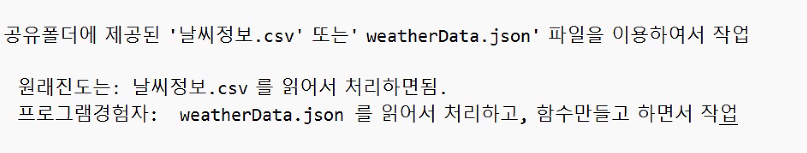

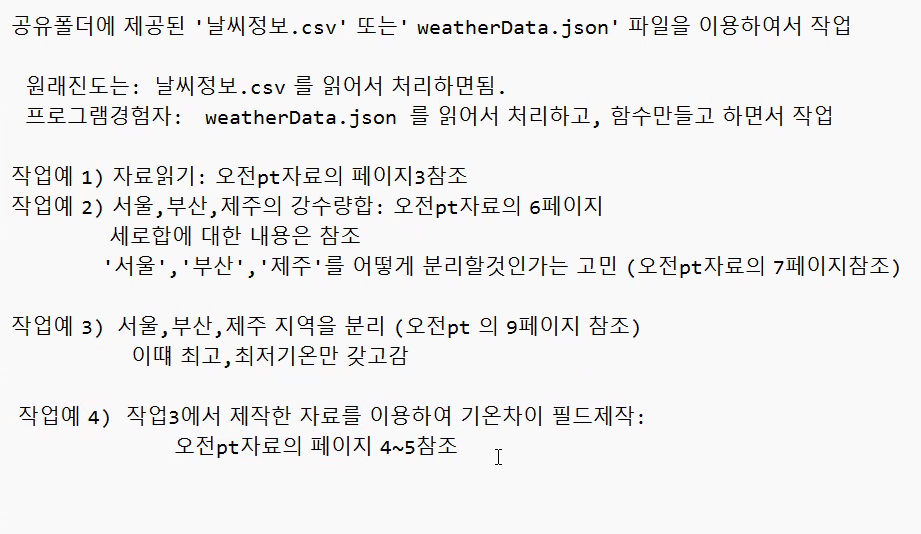

In [1]:
###############################
### csv 파일 읽기/ json 파일 읽기
###############################
import json

data = []
file_path = r'./수정_202301월자료_weatherData1.json'

with open(file_path, 'r') as file:
    data = json.load(file)
    print(data)


{'j': ['서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주', '제주'], 'd': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30', '2023-01-01', '2023-01-02'

In [2]:
####################
### 지점을 '서울', '부산', '제주' 만 출력하고자 함
### 지점 자료의 중복을 제거하고 유니크한 값 출력
####################

unique_jijum = []
unique_jijum = list(set(data['j']))
unique_jijum

['서울', '제주', '부산']

- 1. 우선 각 지점의 개수를 알아보고, 그것을 바탕으로 기온 데이터 슬라이싱 해서 각 지점별 최고/최저 기온을 구하고 평균기온을 구해본다.
- 2. 강수량이 존재하는 날짜와 지점도 출력해본다.
- 3. 일주일 간 각 지점의 평균 기온을 출력해본다.

In [3]:
## 리스트 컴프리헨션으로 지점의 개수 알아보기

from collections import Counter

Counter(data['j'])

Counter({'서울': 30, '부산': 30, '제주': 30})

In [4]:
type(data['max'][1])

str

In [5]:
# 모든 데이터가 10개씩 존재하니, 0:10, 10:20, 20:30으로 슬라이싱 하면 되겠다.
# n이 최저기온이고, m이 최고기온 인듯

# 먼저 리스트 안의 값들이 문자형이기 때문에, 숫자형으로 바꿔줄 것
data['max'] = list(map(float, data['max']))
data['min'] = list(map(float, data['min']))

print('서울의 최고 기온 : ', max(data['max'][:30]), '서울의 최저 기온 : ', min(data['min'][:30]))
print('부산의 최고 기온 : ', max(data['max'][30:60]), '부산의 최저 기온 : ', min(data['min'][30:60]))
print('제주의 최고 기온 : ', max(data['max'][60:-1]), '제주의 최저 기온 : ', min(data['min'][60:-1]))


서울의 최고 기온 :  12.5 서울의 최저 기온 :  -17.3
부산의 최고 기온 :  17.2 부산의 최저 기온 :  -13.5
제주의 최고 기온 :  20.7 제주의 최저 기온 :  -3.4


In [6]:
# 사실.. 지점마다의 데이터가 다 같아서.. 지점마다 최고/최저 기온과 평균기온 구하는게 의미가 없고..  한 지점만 골라서 하면 될 듯

## 서울의 10일간 평균 기온
import numpy as np

print('서울의 30일 간 평균 최고 기온 : %.2f' %np.mean(data['max'][:30]), ', 서울의 30일 간 평균 최저 기온 : %.2f'  %np.mean(data['min'][:30]))

서울의 30일 간 평균 최고 기온 : 3.04 , 서울의 30일 간 평균 최저 기온 : -5.77


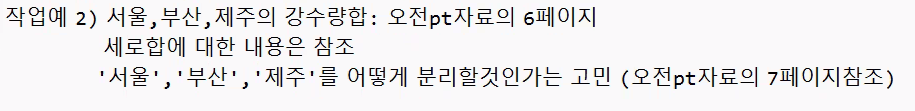

In [7]:
## 강수량 합
# 먼저 강수량의 자료형을 바꿔줘야 함
# 공백 문자가 있으니 strip이나..

import numpy as np

seoul_rainfall = []
jeju_rainfall = []
busan_rainfall = []

# 밑의 과정을 함수로 만들면 좋겠다

for region, rain in zip(data['j'], data['rain']):
    if rain != '':
        if region == '서울':
            seoul_rainfall.append(float(rain))
        elif region == '제주':
            jeju_rainfall.append(float(rain))
        elif region == '부산':
            busan_rainfall.append(float(rain))

# 결과 출력
print(f'서울 강수량 리스트: {seoul_rainfall}')
print(f'제주 강수량 리스트: {jeju_rainfall}')
print(f'부산 강수량 리스트: {busan_rainfall}')

서울 강수량 리스트: [3.9, 0.1, 0.0, 37.3, 1.6, 3.2, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.8, 0.0]
제주 강수량 리스트: [1.7, 0.0, 2.5, 17.7, 2.2, 3.6, 0.0, 0.0, 0.0, 0.0, 5.8, 0.1, 2.3, 0.1, 0.5, 4.8, 0.8, 0.0]
부산 강수량 리스트: [0.0, 0.2, 79.4, 1.7, 0.5, 0.1]


In [12]:
# 강수량의 합을 구해야 하니..
print('서울 강수량 리스트 : ', sum(seoul_rainfall))
print('서울 강수량 리스트 : %.1f' %sum(jeju_rainfall))  # 적당히 소수점 첫번째 자리만
print('서울 강수량 리스트 : ', sum(busan_rainfall))

서울 강수량 리스트 :  47.9
서울 강수량 리스트 : 42.1
서울 강수량 리스트 :  81.9


In [14]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic' # 한글깨짐현상때문에 사용

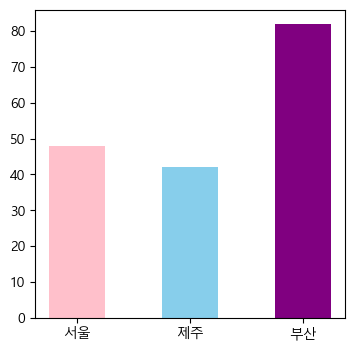

In [28]:
## 대충 그래프 그려봅시다
import matplotlib.pyplot as plt

total_rain_falls = [sum(seoul_rainfall), sum(jeju_rainfall), sum(busan_rainfall)]

plt.figure(figsize=(4, 4))
plt.bar(unique_jijum, total_rain_falls, color=['pink', 'skyblue', 'purple'], width=0.5)  # x, y값
plt.show()

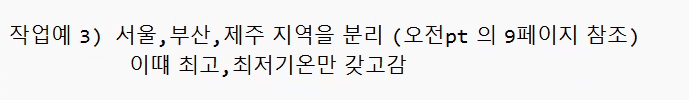

In [32]:
# 아까 Counter로 지역 데이터 개수 세봤으니까..
# 날짜는 후에 날짜별 데이터 분석을 해볼 수 있으니 남겨둠

서울데이터 = {'d':data['d'], 'max':data['max'][:30], 'min':data['min'][:30]}
제주데이터 = {'d':data['d'], 'max':data['max'][30:60], 'min':data['min'][30:60]}
부산데이터 = {'d':data['d'], 'max':data['max'][60:-1], 'min':data['min'][60:-1]}

print(서울데이터)


{'d': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30', '2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30', '2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11',

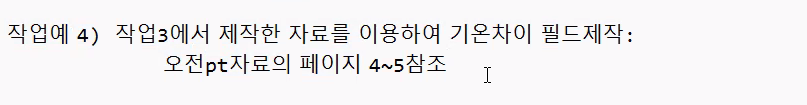

In [65]:
# 컴프리헨션
max_temps = [float(temp) for temp in data['max']]
min_temps = [float(temp) for temp in data['min']]


# 기온 차이를 계산해서 temp_diff라는 리스트에 넣기
# 너무 지저분해서 소수 첫번째 자리까지만 나오게 포맷팅
temp_diff = ['%.1f' % (max_temp - min_temp) for max_temp, min_temp in zip(max_temps, min_temps)]

# 기온차이 필드 열을 추가해보고.. 그래프로도 그려보자
data['기온 차이'] = temp_diff

data['기온 차이'] = list(map(float, data['기온 차이']))

print(data['기온 차이'])
print(type(data['기온 차이'][1]))

[8.1, 7.0, 9.6, 9.0, 9.2, 10.4, 5.2, 10.0, 8.3, 13.0, 11.2, 13.1, 5.0, 4.6, 7.3, 5.6, 6.6, 6.8, 10.3, 9.7, 12.0, 5.4, 11.5, 10.1, 11.9, 5.5, 5.8, 10.6, 12.9, 8.6, 11.2, 8.2, 9.7, 11.5, 10.6, 11.9, 8.0, 14.1, 15.3, 13.4, 13.5, 15.8, 4.5, 5.9, 7.4, 8.6, 9.3, 9.0, 10.3, 10.2, 11.9, 7.6, 12.7, 15.5, 12.5, 12.6, 8.7, 10.5, 13.4, 9.6, 5.7, 4.1, 4.0, 5.8, 9.2, 6.7, 5.3, 10.8, 9.8, 11.7, 9.6, 10.3, 6.2, 5.6, 5.2, 1.1, 1.9, 3.2, 3.4, 7.5, 3.6, 7.5, 6.8, 8.6, 4.9, 9.2, 6.2, 5.4, 3.9, 7.0]
<class 'float'>


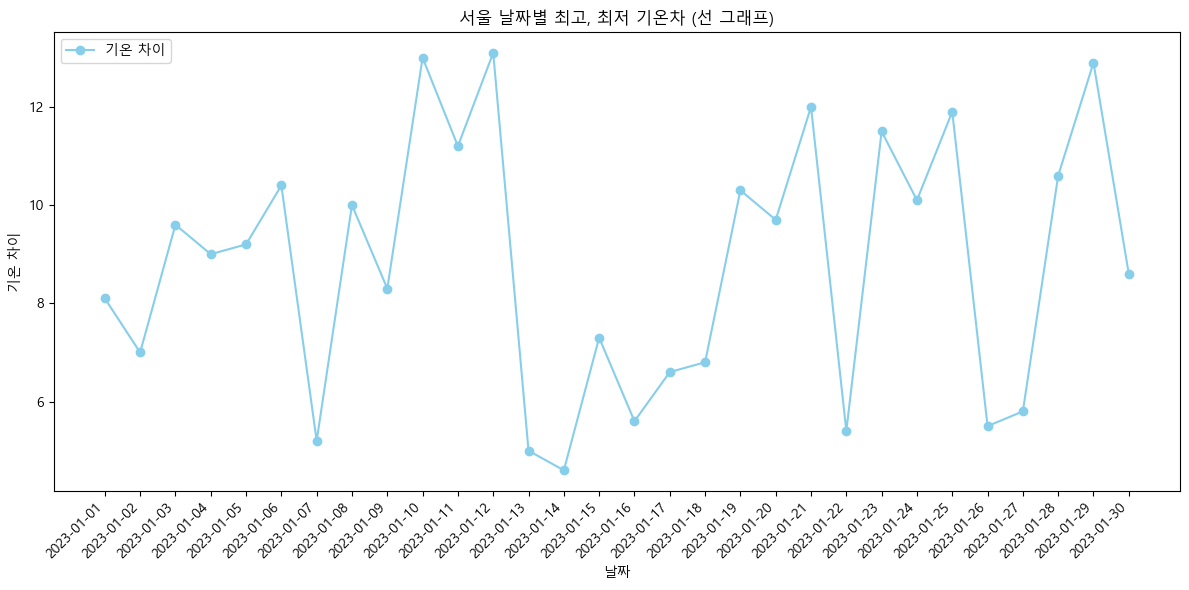

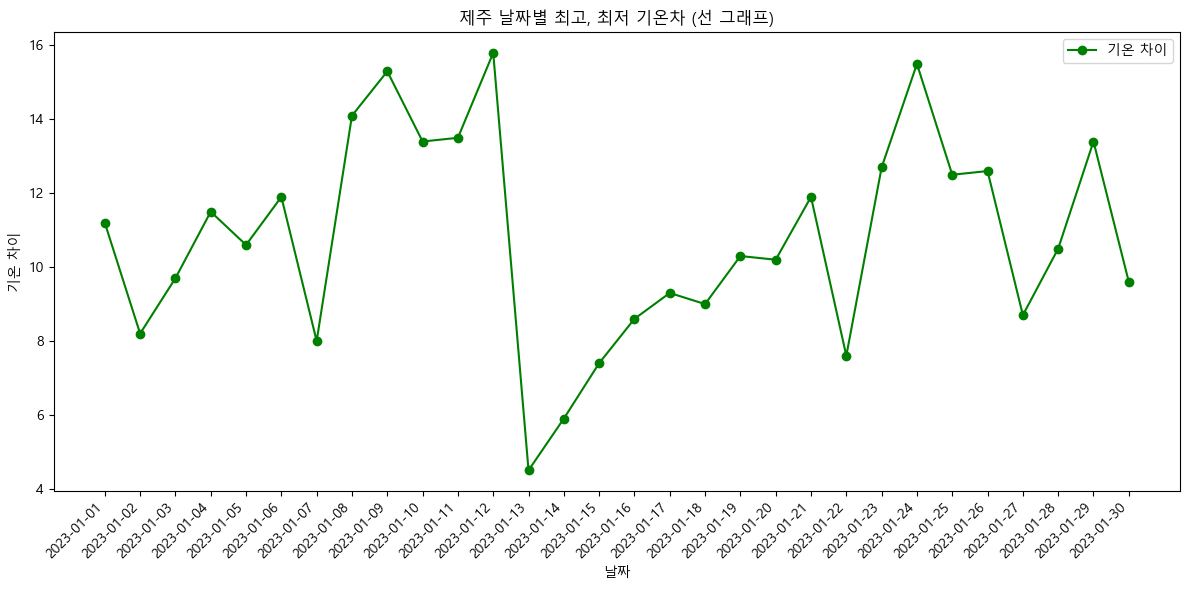

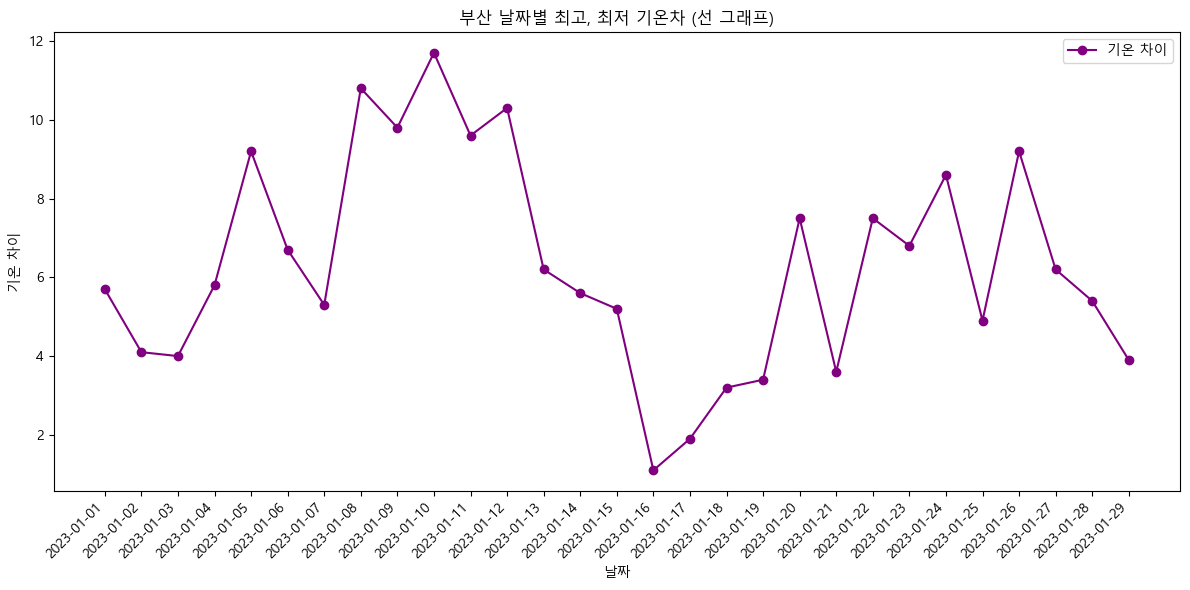

In [67]:
def plot_temperature_difference_line(data, region_name, bar_color='orange'):
    plt.figure(figsize=(12, 6))
    plt.title(f'{region_name} 날짜별 최고, 최저 기온차 (선 그래프)')
    plt.xlabel('날짜')
    plt.ylabel('기온 차이')
    
    # 각 날짜별로 선 그래프를 그리도록 수정
    plt.plot(data['d'], data['기온 차이'], label='기온 차이', color=bar_color, marker='o')
    
    plt.xticks(rotation=45, ha='right')  # 날짜가 겹치지 않도록 회전
    plt.legend()
    plt.tight_layout()  # 레이아웃 조정
    plt.show()

# 서울 데이터 처리
서울데이터 = {'d': data['d'][:30], '기온 차이': data['기온 차이'][:30]}
plot_temperature_difference_line(서울데이터, '서울', bar_color='skyblue')

# 제주 데이터 처리
제주데이터 = {'d': data['d'][30:60], '기온 차이': data['기온 차이'][30:60]}
plot_temperature_difference_line(제주데이터, '제주', bar_color='green')

# 부산 데이터 처리
부산데이터 = {'d': data['d'][60:-1], '기온 차이': data['기온 차이'][60:-1]}
plot_temperature_difference_line(부산데이터, '부산', bar_color='purple')
